#### Questions

Whats the leading cause of cancer death worldwide?
Can Air Pollution lead to an increased risk of lung cancer?


## Introduction

In this notebook, I will break down the lung cancer risk factors of 1000 patients who had lung cancer. There will be evidence that air pollution is linked to an increased risk of lung cancer, even in nonsmokers. Lung Cancer is a complex disease with multiple risk factors and causes. It can develop when cells in the lungs undergo genetic mutations that lead to uncontrolled growth and the formation of a tumor. While the exact cause of these mutations can be influenced by various factors, there are several primary causes and risk factors associated with lung cancer.

### Imports

In [1]:
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O
import numpy as np # data structures, mathematical functions
import matplotlib.pyplot as plt # data visulation and ploting
import seaborn as sns # data visulation and plotin

### Load the cancer data

In [2]:
cancer_data = pd.read_csv('cancer patient data sets.csv')

In [3]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [4]:
cancer_data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Ploting the risk factors

Smoking is the leading cause of lung cancer. It is responsible for roughly 85% of all cases. Cigarette smoke contains cancer-causing substances that can damage lung tissue and lead to the development of cancer over time.

Exposure to secondhand smoke, also known as passive smoking or environmental tobacco smoke, is another significant risk factor. It can lead to lung cancer, particularly in non-smokers who are exposed to smoke at home or in the workplace.

Long-term exposure to high levels of air pollution, particularly in urban areas with heavy traffic, can contribute to the development of lung cancer. Air pollutants, such as particulate matter and polycyclic aromatic hydrocarbons, are associated with increased risk.

In the below plot, the y-axis is the amount of patients, the x-axis is the exposure level to the cancer risk factors. The higher the number the more exposed the patient is to that cancer risk factor. You can notice that Air Pollution at a moderatly high exposure is a risk to over 300 patients who have lung cancer.

<Axes: ylabel='Count'>

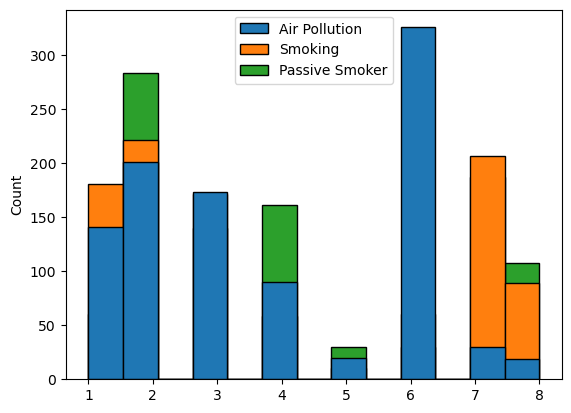

In [5]:
sns.histplot(cancer_data[['Air Pollution', 'Smoking', 'Passive Smoker']], alpha=1)

In [6]:
air_poll_cancer = cancer_data[['Gender', 'Age', 'Air Pollution', 'Smoking', 'Passive Smoker', 'Level']]

In [7]:
air_poll_cancer.head()

,Gender,Age,Air Pollution,Smoking,Passive Smoker,Level
0,1,33,2,3,2,Low
1,1,17,3,2,4,Medium
2,1,35,4,2,3,High
3,1,37,7,7,7,High
4,1,46,6,8,7,High


In the below plot, the hue of the plot is the level of pollution for each patients risk factor. These levels of small, medium, high, with there corrisponding colors will show the comparision of each risk factor. You will notice that Air Pollution patients have a high pollution in the moderatly high exposed areas. Passive Smokers have a high pollution level in the moderatly high exposed areas as well.

/Users/kendallherron/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


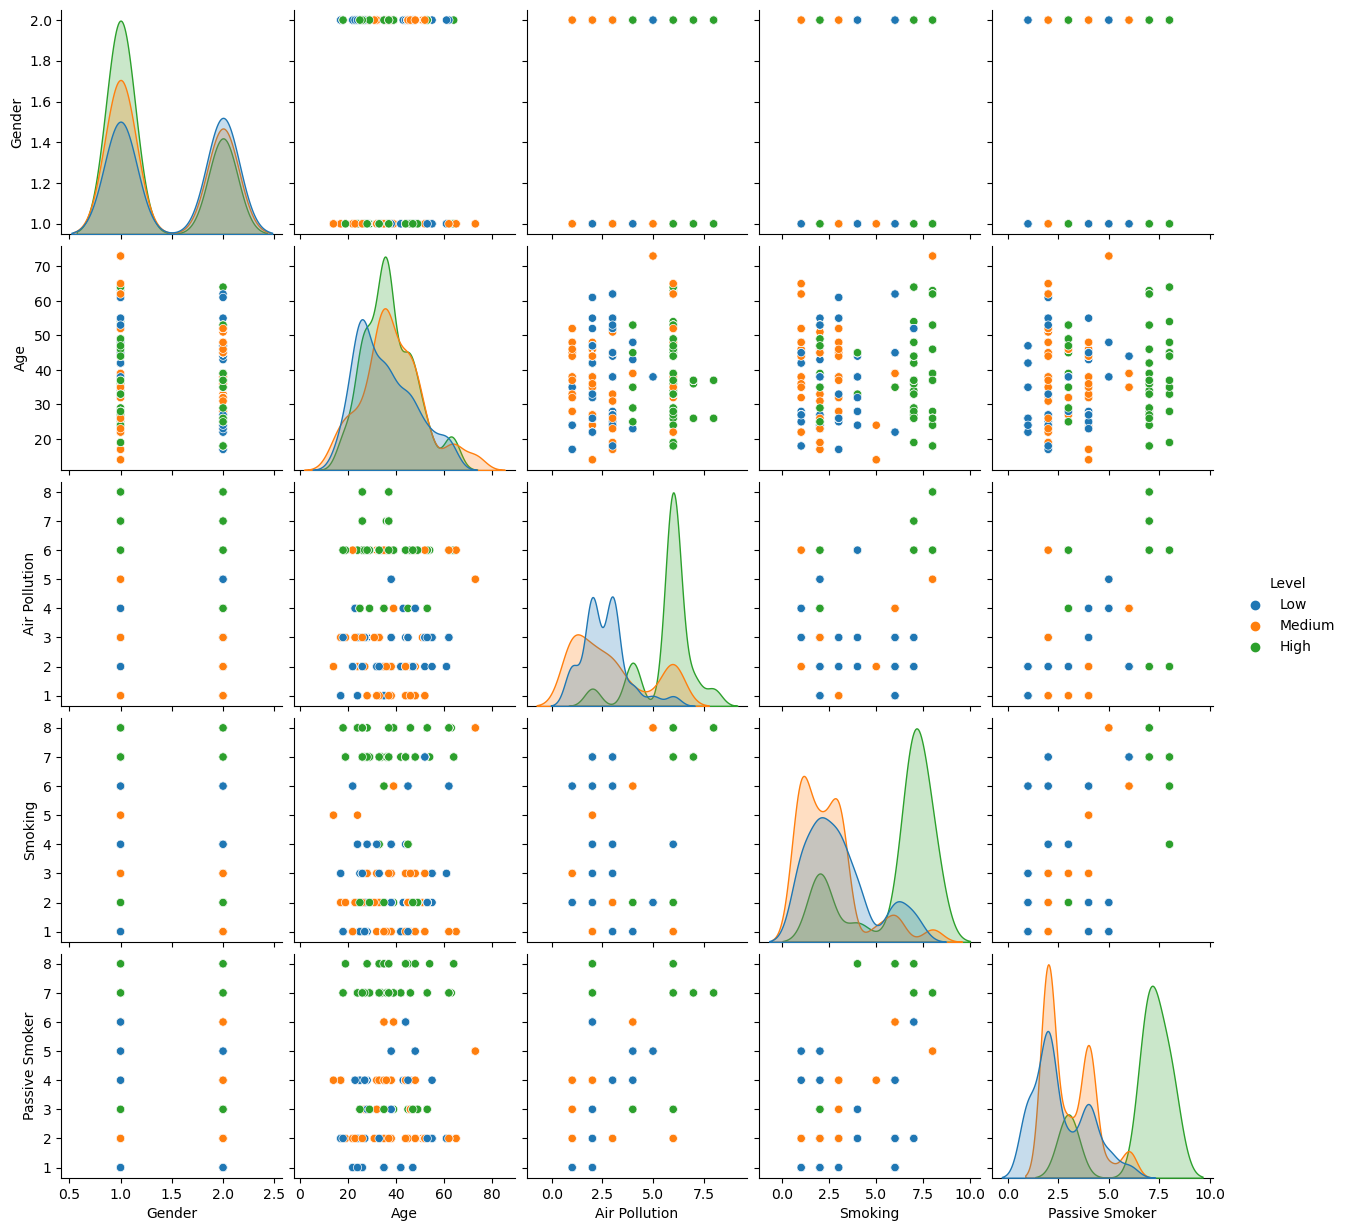

In [8]:
sns.pairplot(data=air_poll_cancer, hue='Level')
plt.show()

### Correlation between all the risk factors

In the below plot, the correlation of all possible risk factors are displayed with the value from 0 being the least correlated to 1 having the exact correlation. You can notice that Air Pollution patients, smoking patients, and passive smokers all highly correlate with each other. 

/var/folders/m3/xf6gvy7n3qdbcwzd5vjb0b7r0000gn/T/ipykernel_85671/3273176533.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = cancer_data.corr()


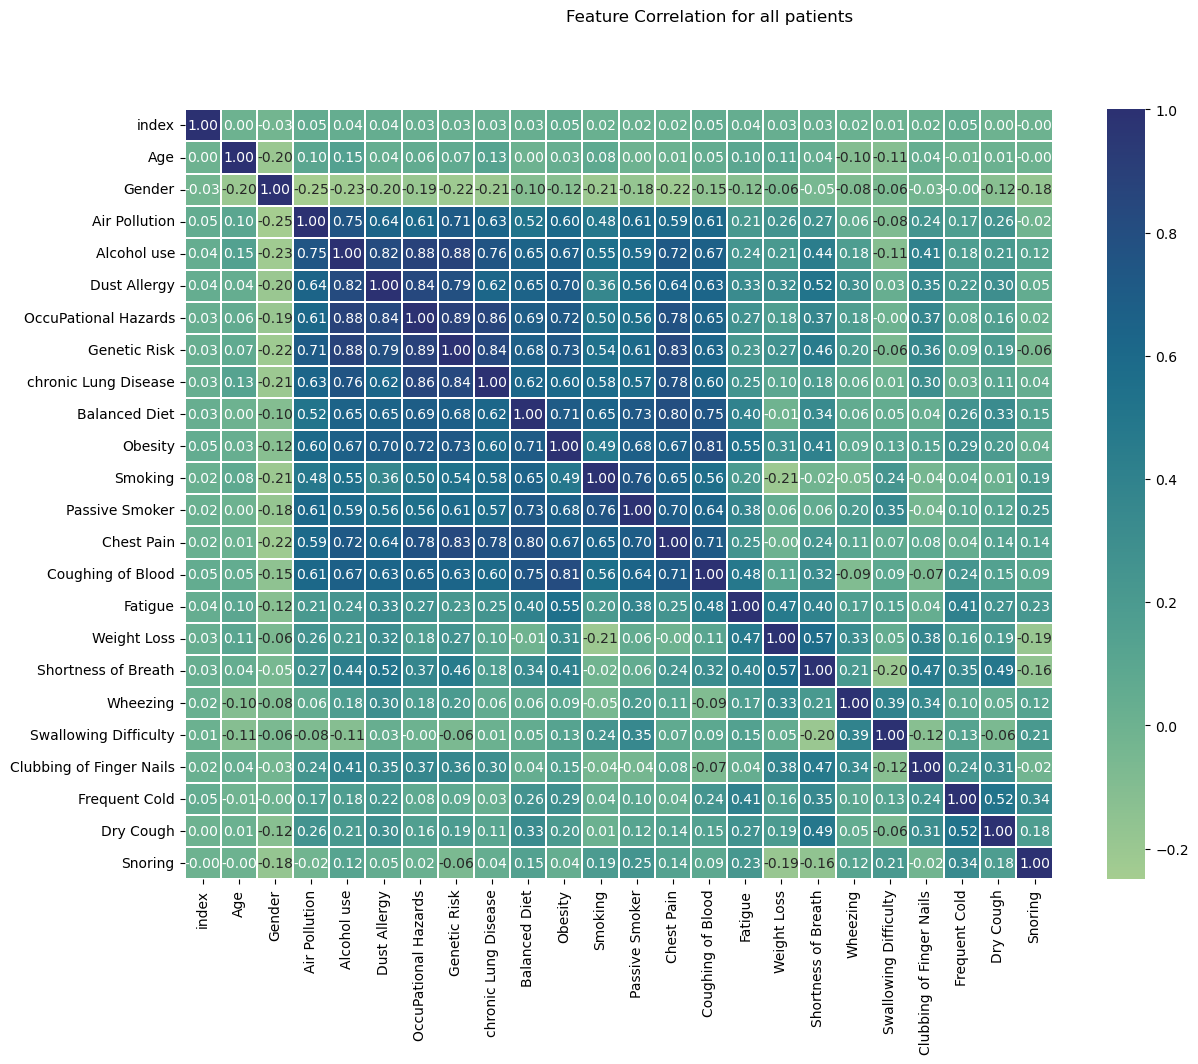

In [9]:
matrix = cancer_data.corr()
x, ax = plt.subplots(figsize=(14, 10))
heatmap = sns.heatmap(round(matrix,2), annot=True, ax=ax, cmap="crest",fmt='.2f', linewidths=.05)
x.subplots_adjust()
title = x.suptitle('Feature Correlation for all patients', fontsize=12)

### Conclusion

The prognosis for lung cancer varies widely depenidng on the stage at diagnosis. Early detection and treatment tend to yield better outcomes, as the disease is often asymptomatic in its ealry stages when its most treatable. Its crucial for individuals at risk, such as people who breath in high air pollutions or smokers, to undergo regular screenings and seek medical attention if they experience any convering symptoms. Implementing effective measures to reduce pollution levels and protect public health will help reduce the risk of lung cancer.